In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import seaborn as sns
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from scipy.stats import kruskal

In [ ]:
# Reading the dataset
df = pd.read_csv("Health Insurance Dataset.csv")

## Part 1: A: Select four variables two quantiative/numeric and two qualitative/categorical
# Univariate visualization

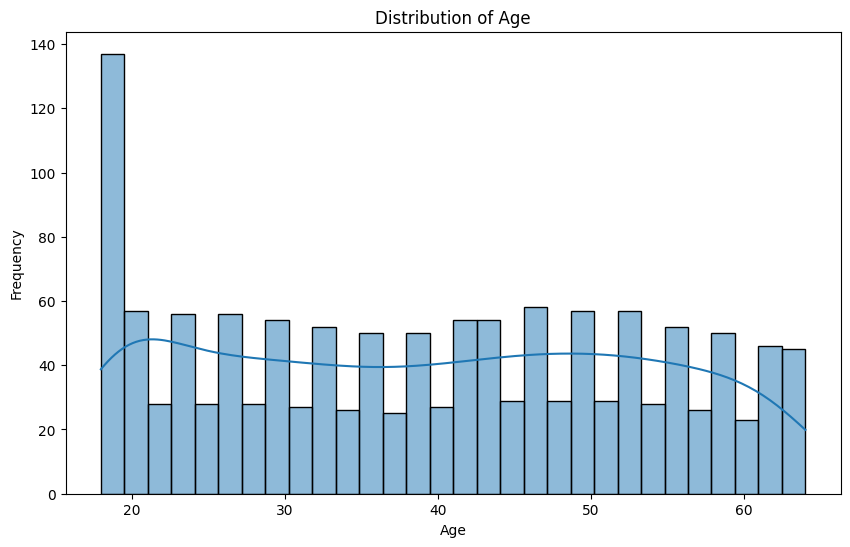

In [ ]:
# Age (Quantitative/Numeric)
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

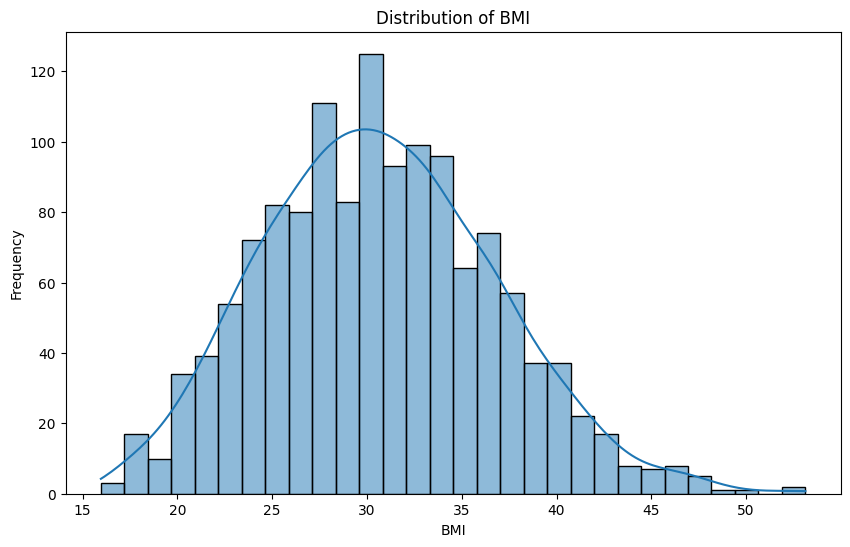

In [ ]:
# BMI (Quantitative/Numeric)
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

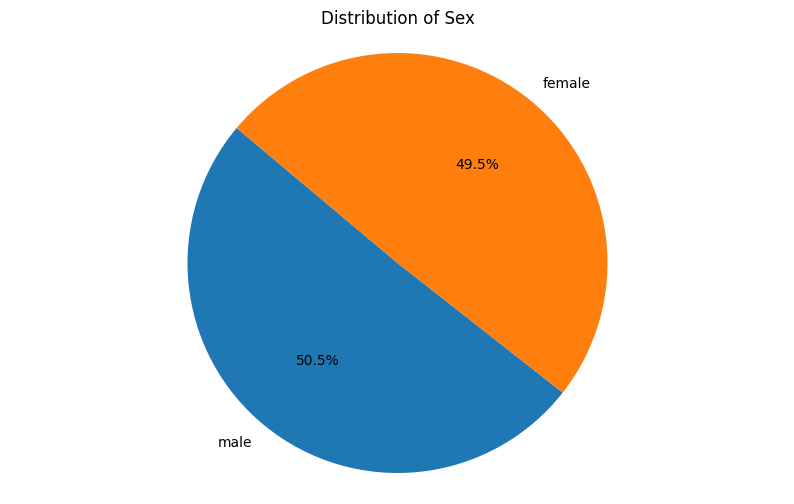

In [ ]:
# Sex (Qualitative/Categorical)
plt.figure(figsize=(10, 6))
plt.pie(df['sex'].value_counts(), 
        labels=df['sex'].value_counts().index, 
        autopct='%1.1f%%', startangle=140
        )
plt.title('Distribution of Sex')
plt.axis('equal')
plt.show()


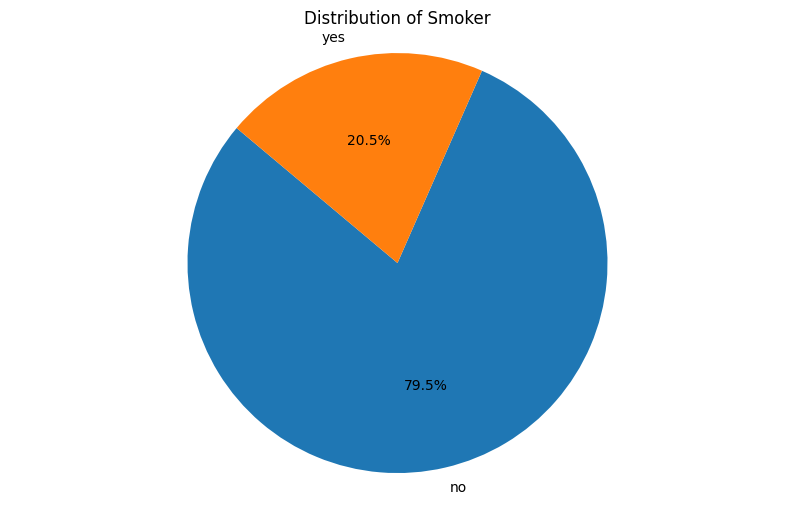

In [ ]:
# Smoker (Qualitative/Categorical)
plt.figure(figsize=(10, 6))
plt.pie(df['smoker'].value_counts(), 
        labels=df['smoker'].value_counts().index, 
        autopct='%1.1f%%', startangle=140
        )
plt.title('Distribution of Smoker')
plt.axis('equal')
plt.show()


# Part 1: B: Bivariate visualization

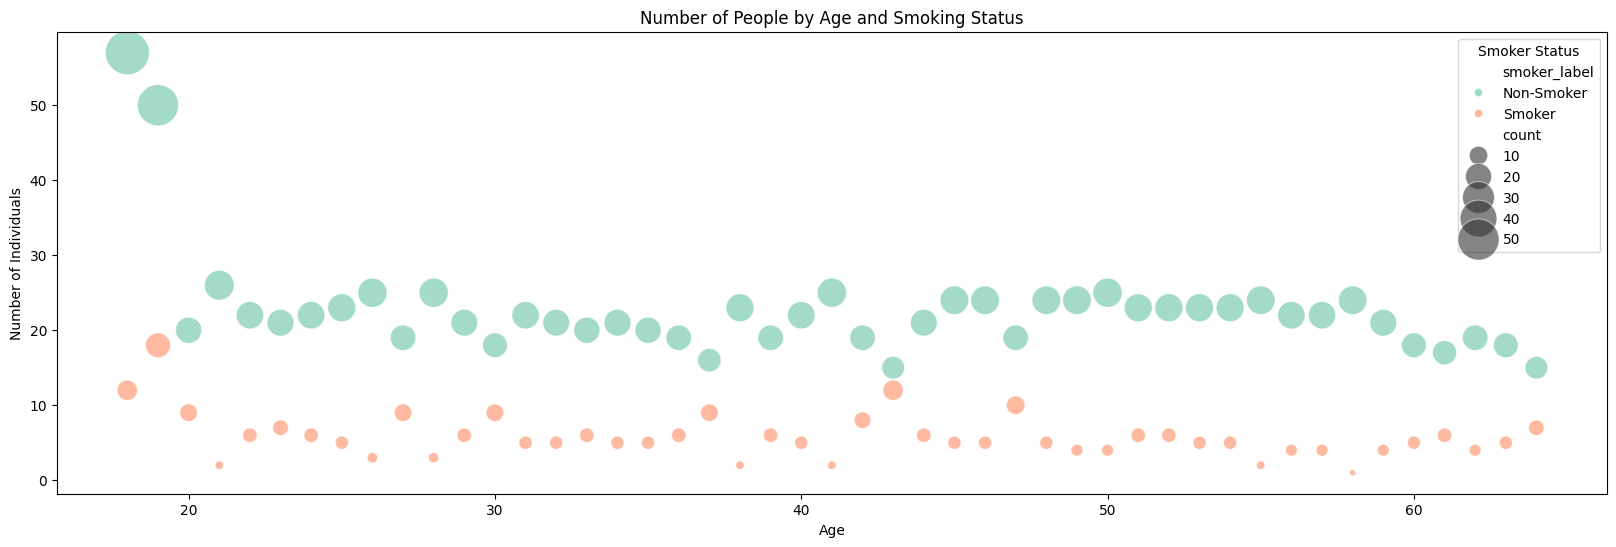

In [ ]:
# Age and Smoker
# Ensure correct types
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Aggregate: count number of people for each age x smoker status
age_smoker_counts = df.groupby(['age', 'smoker']).size().reset_index(name='count')
age_smoker_counts['smoker_label'] = age_smoker_counts['smoker'].map({'yes': 'Smoker', 'no': 'Non-Smoker'})

# Sort by age
age_smoker_counts = age_smoker_counts.sort_values(by='age')

# Plot bubble chart
plt.figure(figsize=(20, 6))
sns.scatterplot(
    data=age_smoker_counts, 
    x='age', 
    y='count', 
    size='count', 
    sizes=(20, 1000), 
    alpha=0.6, 
    hue='smoker_label',
    palette='Set2',
    legend='brief'
)

plt.title('Number of People by Age and Smoking Status')
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
legend_title = plt.legend(title='Smoker Status')
plt.show()

C:\Users\18315\AppData\Local\Temp\ipykernel_36808\2467865113.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bmi_counts = df.groupby(['age', 'bmi_category']).size().reset_index(name='count')


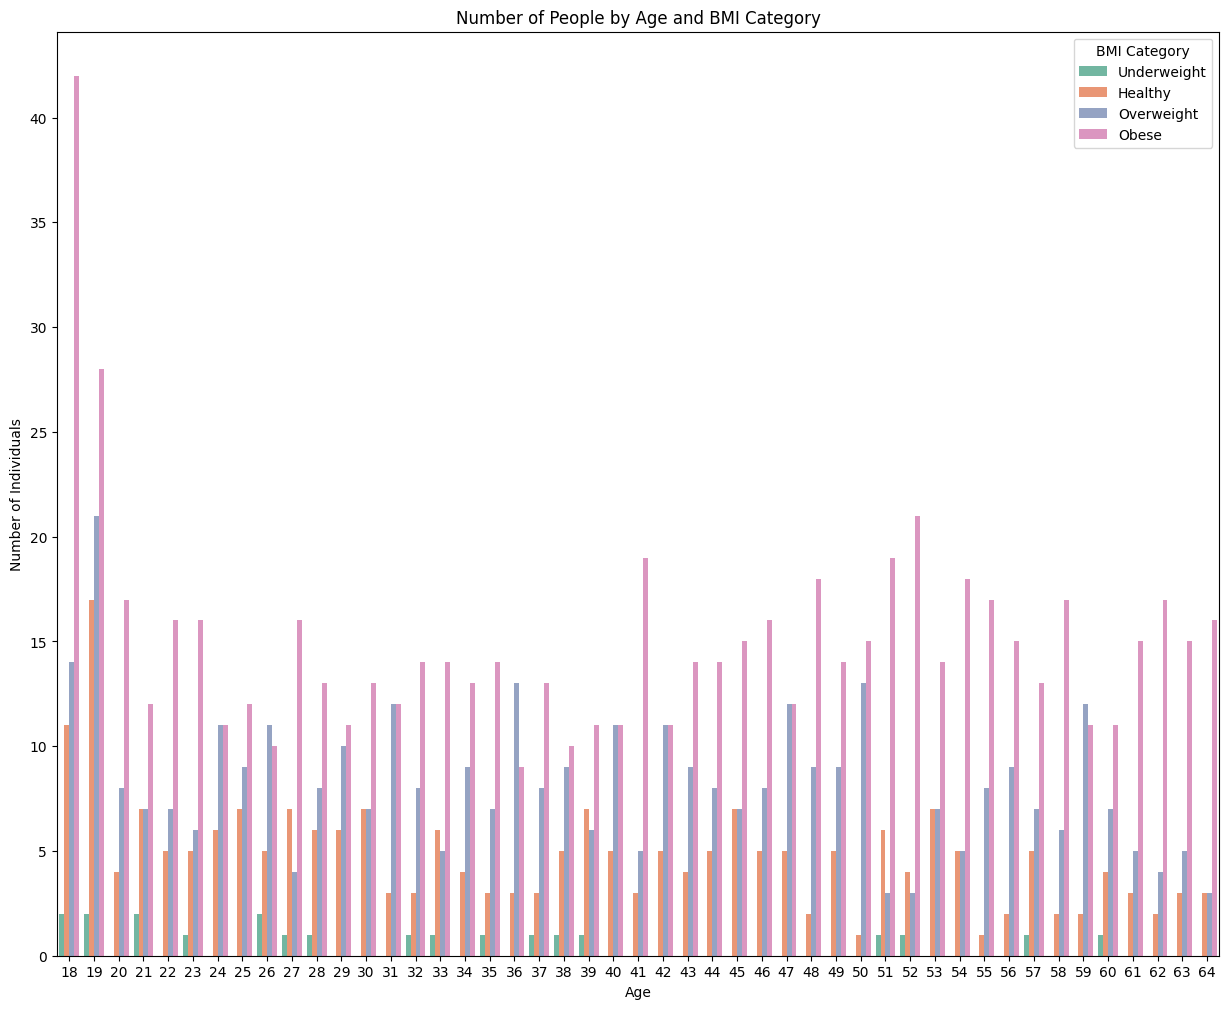

In [ ]:
# Age and BMI
#Ensure correct types
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Define bmi bins
bmi_bins = [0, 18.5, 25, 30, 100]
bmi_labels = ['Underweight', 'Healthy', 'Overweight', 'Obese']
df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels)

# Aggregate: count number of people for each age x bmi category
age_bmi_counts = df.groupby(['age', 'bmi_category']).size().reset_index(name='count')

# Sort by age
age_bmi_counts = age_bmi_counts.sort_values(by='age')

plt.figure(figsize=(15, 12))
sns.barplot(
                data=age_bmi_counts, 
                x='age', 
                y='count', 
                hue='bmi_category',
                palette='Set2'
                )
plt.title('Number of People by Age and BMI Category')
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
plt.legend(title='BMI Category')
plt.show()


C:\Users\18315\AppData\Local\Temp\ipykernel_36808\1993757066.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_smoker_counts = df.groupby(['bmi_category', 'smoker']).size().reset_index(name='count')


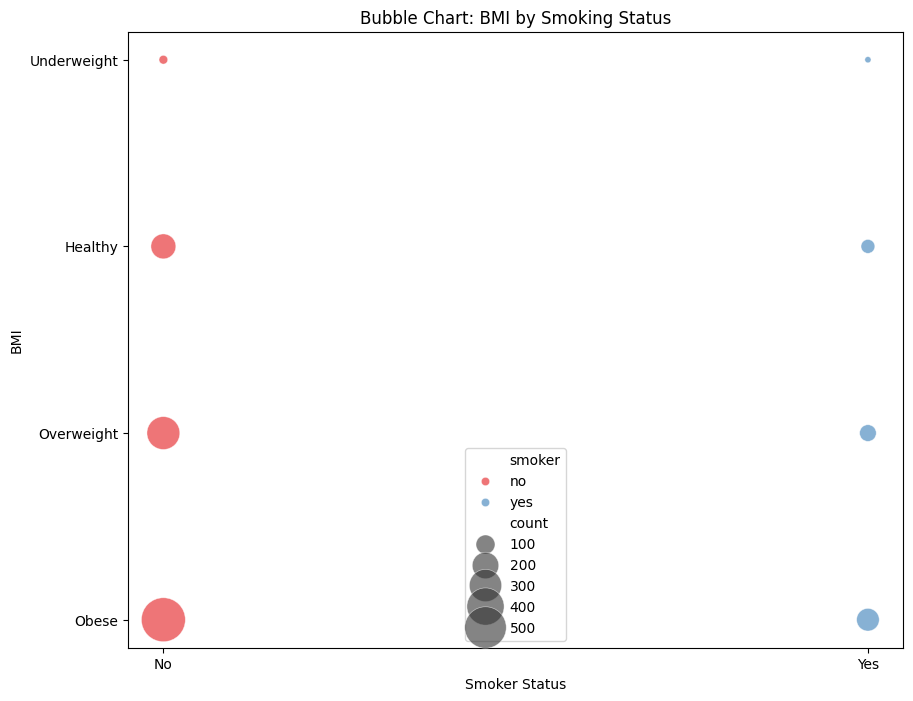

In [ ]:
# BMI and Smoker
# Ensure correct types
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')

# Define bmi bins
bmi_bins = [0, 18.5, 25, 30, 100]
bmi_labels = ['Underweight', 'Healthy', 'Overweight', 'Obese']
df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels)

# Count number of people per BMI category and smoker status
bmi_smoker_counts = df.groupby(['bmi_category', 'smoker']).size().reset_index(name='count')

# Bubble chart BMI vs Smoker
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=bmi_smoker_counts,
    x='smoker',
    y='bmi_category',
    size='count',
    sizes=(20, 1000),
    alpha=0.6,
    hue='smoker',
    palette='Set1',
    legend='brief'
)
plt.xticks([0,1], ['No', 'Yes'])
plt.title('Bubble Chart: BMI by Smoking Status')
plt.xlabel('Smoker Status')
plt.ylabel('BMI')
plt.show()



sex         female  male
smoker                  
non-smoker     547   517
smoker         115   159


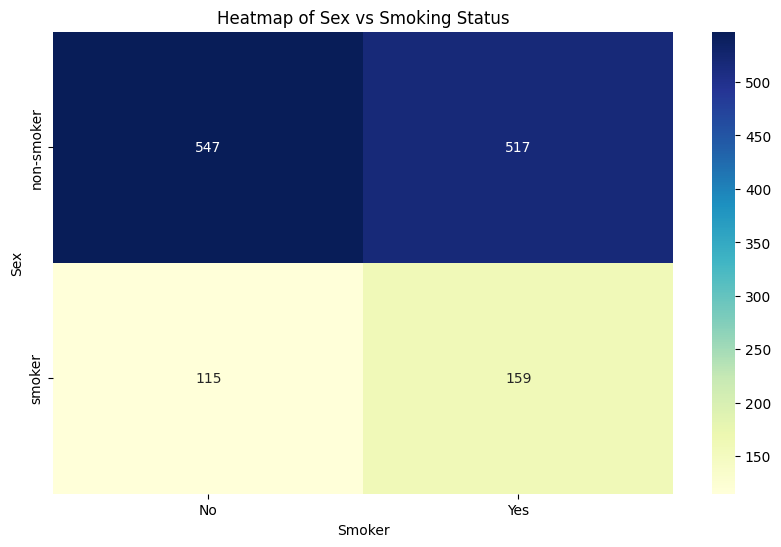

In [ ]:
# Smoker and Sex
# Ensure correct types
df['smoker'] = df['smoker'].map({'yes': 'smoker', 'no': 'non-smoker'})
df['sex'] = df['sex'].map({'male': 'male', 'female': 'female'})

# Create a cross-tabulation
# This is create a count table 
cross_tab = pd.crosstab(df['smoker'], df['sex'])
print(cross_tab)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Sex vs Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Sex')
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks
plt.show()



C:\Users\18315\AppData\Local\Temp\ipykernel_36808\3953038182.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_counts = df.groupby(['bmi_category', 'sex']).size().reset_index(name='count')


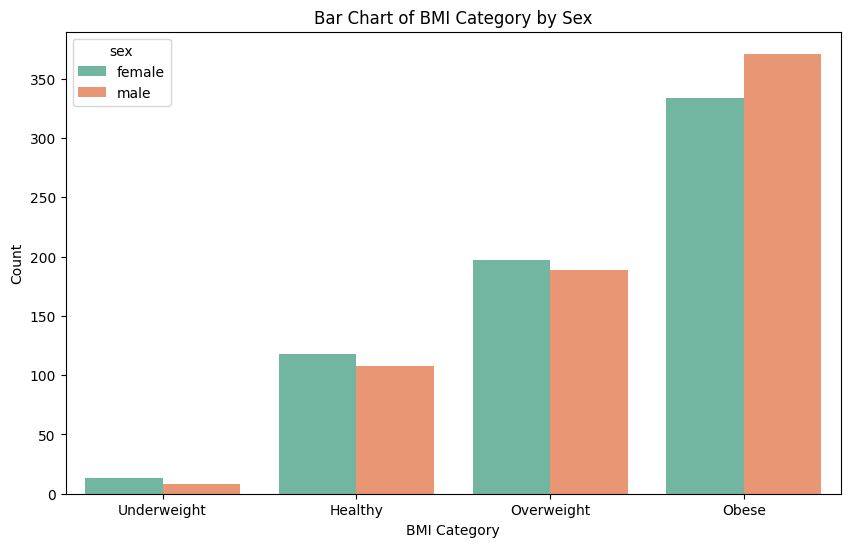

In [ ]:
# Sex and BMI
# Ensure correct
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')
df['sex'] = df['sex'].map({'male': 'male', 'female': 'female'})

# Bin BMI into categories
bmi_bins = [0, 18.5, 25, 30, 100]
bmi_labels = ['Underweight', 'Healthy', 'Overweight', 'Obese']

df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels)

# Count number of people per sex and BMI category
bmi_counts = df.groupby(['bmi_category', 'sex']).size().reset_index(name='count')

# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=bmi_counts, x='bmi_category', y='count', hue='sex', palette='Set2')
plt.title('Bar Chart of BMI Category by Sex')
plt.xlabel('BMI Category')
plt.ylabel('Count') 
plt.show()



# Part 1: B Descriptive statistics for Quantitative/Numeric variables chosen in Part 1A

In [ ]:
# Mean, Median, Mode, Standard Deviation, Minimum, Maximum, and Range for Age
# Ensure correct types
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')

# numeric variables
numeric_cols = ['age', 'bmi']

# Create a DataFrame to store the statistics
stats_df = pd.DataFrame(index=numeric_cols)

# Calculate statistics
stats_df['Mean'] = df[numeric_cols].mean().round(2)
stats_df['Median'] = df[numeric_cols].median().round(2)
stats_df['range'] = (df[numeric_cols].max() - df[numeric_cols].min()).round(2)
stats_df['Standard Deviation'] = df[numeric_cols].std().round(2)
stats_df['Variance'] = df[numeric_cols].var().round(2)
stats_df['10th Percentile'] = df[numeric_cols].quantile(0.1).round(2)
stats_df['25th Percentile'] = df[numeric_cols].quantile(0.25).round(2)
stats_df['50th Percentile'] = df[numeric_cols].quantile(0.5).round(2)
stats_df['75th Percentile'] = df[numeric_cols].quantile(0.75).round(2)
stats_df['90th Percentile'] = df[numeric_cols].quantile(0.9).round(2)

print("=== Statistics for Quantitative/Numeric Variables ===")
print(stats_df)


=== Statistics for Quantitative/Numeric Variables ===
      Mean  Median  range  Standard Deviation  Variance  10th Percentile  \
age  39.21    39.0  46.00               14.05    197.40            19.00   
bmi  30.66    30.4  37.17                6.10     37.19            22.99   

     25th Percentile  50th Percentile  75th Percentile  90th Percentile  
age             27.0             39.0            51.00            59.00  
bmi             26.3             30.4            34.69            38.62  


- Part 1: B Descriptive statistics for Qualitative/Categorical Variables

In [ ]:
df.columns = df.columns.str.lower().str.strip()  # Convert column names to lowercase for consistency
categorical_cols= ['sex', 'smoker', 'region', 'level']

for col in categorical_cols:
    print(f"\n=== Descriptive Statistics for {col} ===")
    
    if col not in df.columns:
        print(f"Column '{col}' not found in the dataset.")
        continue
    
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    cat_status = pd.DataFrame({'Count': counts, 'Percentage': percentages.round(1)})
    
    if cat_status.empty:
        print(f"No data available for column '{col}'.")
    else:
        print(cat_status)


=== Descriptive Statistics for sex ===
        Count  Percentage
sex                      
male      676        50.5
female    662        49.5

=== Descriptive Statistics for smoker ===
            Count  Percentage
smoker                       
non-smoker   1064        79.5
smoker        274        20.5

=== Descriptive Statistics for region ===
           Count  Percentage
region                      
southeast    364        27.2
southwest    325        24.3
northwest    325        24.3
northeast    324        24.2

=== Descriptive Statistics for level ===
       Count  Percentage
level                   
C        427        31.9
D        348        26.0
B        264        19.7
E        187        14.0
A        112         8.4


In [ ]:
# D-5 Write code to run the parametric test and provide the output and the results of
# all calculations from the parametric statistical test



df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')
df['charges'] = pd.to_numeric(df['charges'], errors='coerce')

df['smoker'] = df['smoker'].astype(str).str.lower().str.strip()
df['smoker'] = df['smoker'].replace({'smoker': 1, 'non-smoker': 0})

df_clean = df.dropna(subset=['age', 'bmi', 'smoker', 'charges'])

# Used to find out why model = sm.OLS(y, X).fit() was not working
# found that I had to put yes and no from smoking columns as 
# smoker and non-smoker instead of yes and no
print(df_clean[['age','bmi','smoker','charges']].nunique())
print(df_clean[['age','bmi','smoker','charges']].head())


# Define idenpendent variables and dependent variables
X = sm.add_constant(df_clean[['age', 'bmi', 'smoker']])
y = df_clean['charges']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

# Extracting coefficients, p-values, and R-squared
coefficients = model.params.round(4)
p_values = model.pvalues.round(4)
r_squared = model.rsquared.round(4)

print("\n=== Regression Coefficients ===")
print(coefficients)

print("\n=== P-values ===")
print(p_values)

print('\n=== R-squared ===')
print(r_squared)


age          47
bmi         600
smoker        2
charges    1337
dtype: int64
   age    bmi  smoker   charges
0   19  27.90       1  16884.92
1   31  25.74       0   3756.62
2   46  33.44       0   8240.59
3   37  27.74       0   7281.51
4   60  25.84       0  28923.14
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Mon, 09 Feb 2026   Prob (F-statistic):               0.00
Time:                        02:14:59   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:    

C:\Users\18315\AppData\Local\Temp\ipykernel_36808\1344466322.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'] = df['smoker'].replace({'smoker': 1, 'non-smoker': 0})


In [ ]:
# serpate regions
charges_northwest = df_clean[df_clean['region'] == 'northwest']['charges']
charges_southeast = df_clean[df_clean['region'] == 'southeast']['charges']
charges_southwest = df_clean[df_clean['region'] == 'southwest']['charges']
charges_northeast = df_clean[df_clean['region'] == 'northeast']['charges']

# Perform Kruskal-Wallis H-test
statistic, p_value = kruskal(charges_northwest, charges_southeast, charges_southwest, charges_northeast)
print(f"Kruskal-Wallis H-test statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in charges across regions.")   
else:
    print("Fail to reject the null hypothesis: There is no significant difference in charges across regions.")

Kruskal-Wallis H-test statistic: 4.7342
P-value: 0.1923
Fail to reject the null hypothesis: There is no significant difference in charges across regions.


No citations/outsources were used for this project.